In [1]:
# test.py
from PyD0ToKSpipi2018 import *

# Create an instance to check if the issue is resolved
obj = PyD0ToKSpipi2018()
obj.init()  # Call some methods to ensure functionality

D0ToKSpipi2018 ==> Initialization !


In [2]:
import uproot as up
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
int_path='/software/pc24403/PCBPGGSZ/Int'
f = up.open(int_path+'/weighted_b2dpi_LL_p.root:DalitzEventList')
branch_names = ["_1_K0S0_E", "_1_K0S0_Px", "_1_K0S0_Py", "_1_K0S0_Pz",
                         "_2_pi#_E", "_2_pi#_Px", "_2_pi#_Py", "_2_pi#_Pz",
                         "_3_pi~_E", "_3_pi~_Px", "_3_pi~_Py", "_3_pi~_Pz"]


array = f.arrays(branch_names)

p1 = cp.asarray([array["_1_K0S0_E"], array["_1_K0S0_Px"], array["_1_K0S0_Py"], array["_1_K0S0_Pz"]])
p2 = cp.asarray([array["_2_pi#_E"], array["_2_pi#_Px"], array["_2_pi#_Py"], array["_2_pi#_Pz"]])
p3 = cp.asarray([array["_3_pi~_E"], array["_3_pi~_Px"], array["_3_pi~_Py"], array["_3_pi~_Pz"]])
              




In [3]:
# convert 4*1000 into a vectot<double>
p1 = cp.transpose(p1)
p2 = cp.transpose(p2)
p3 = cp.transpose(p3)

In [4]:
def get_mass(p1,p2):
    return ((p1[:,0]+p2[:,0])**2 - (p1[:,1]+p2[:,1])**2 - (p1[:,2]+p2[:,2])**2 - (p1[:,3]+p2[:,3])**2)

In [5]:
amp = cp.load('/shared/scratch/pc24403/amp_test/Int_b2dpi_LL_p_amp.npy')
ampbar = cp.load('/shared/scratch/pc24403/amp_test/Int_b2dpi_LL_p_ampbar.npy')

In [6]:
s1 = get_mass(p1, p2)
s2 = get_mass(p1, p3)

In [7]:
def DeltadeltaD(A, Abar):
    temp_var = cp.angle(A*cp.conj(Abar))
    var_a = cp.where(temp_var>cp.pi, temp_var-2*cp.pi, temp_var)
    var = (temp_var + cp.pi) % (2 * cp.pi) - cp.pi    
    return var

In [8]:
phaseDiff = DeltadeltaD(amp, ampbar)


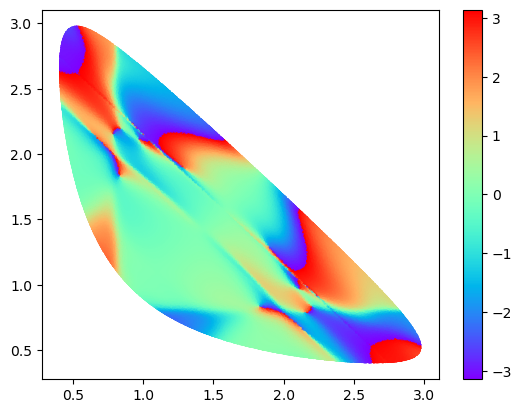

In [9]:
plt.scatter(s1.get(), s2.get(), c=phaseDiff.get(), cmap='rainbow',s=0.1)
plt.colorbar()

In [29]:
import tensorflow as tf
def totalAmplitudeSquared_Integrated_crossTerm(A, Abar):
    '''
    This function calculates the total amplitude squared for the integrated decay, v0.1 only for MD fitted, no correction yet
    '''

    phase = DeltadeltaD(A, Abar)
    
    real_part = cp.sum(cp.abs(A.real)*cp.abs(Abar.real)*cp.cos(phase))
    imag_part = cp.sum(cp.abs(A.real)*cp.abs(Abar.real)*cp.sin(phase))

    print(phase.shape[1])

    return (real_part/A.shape[1], imag_part/Abar.shape[1])

In [30]:
normalisationCrossTerms_p = totalAmplitudeSquared_Integrated_crossTerm(amp, ampbar)

810359


In [44]:
amp[:,:1]


array([[4.17171231+4.06239963j]])

In [55]:
cp.abs(amp[:,:1])

array([[5.82290945]])

In [60]:
mod = amp[:,:1]*cp.conj(amp[:,:1])

In [66]:
print(cp.abs(mod))

[[33.90627441]]


In [46]:
A = complex(4.17171231, 4.06239963)

In [74]:
cp.abs(A)**2

array(33.90627435)

In [69]:
def abs(A):
    return cp.abs(A*cp.conj(A))

In [70]:
abs(A)

array(33.90627435)

In [76]:
import tensorflow as tf
from tensorflow.python.ops.resource_variable_ops import ResourceVariable

In [77]:
tf.log(A)

AttributeError: module 'tensorflow' has no attribute 'log'